# Imports

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('data.csv')

In [41]:
# Exploración inicial del dataset
print("Dimensiones del dataset:", df.shape)
print("\nInformación del dataset:")
print(df.info())

print("\nTipos de datos de las columnas:")
print(df.dtypes)

# Tratar SeniorCitizen como categórica (viene como 0/1 en el CSV)
if 'SeniorCitizen' in df.columns:
    df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# Identificar variables numéricas y categóricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nVariables numéricas:")
print(numeric_cols.tolist())
print("\nVariables categóricas:")
print(categorical_cols.tolist())

Dimensiones del dataset: (7043, 21)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-

In [42]:
# Análisis de datos faltantes
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

# Crear un DataFrame con los resultados
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentages
})

# Mostrar solo las columnas que tienen valores faltantes (si las hay)
missing_info_filtered = missing_info[missing_info['Missing Values'] > 0]

if len(missing_info_filtered) > 0:
    print("Columnas con valores faltantes:")
    print(missing_info_filtered)
else:
    print("No hay valores faltantes en el dataset")

No hay valores faltantes en el dataset


In [43]:
# Importar LabelEncoder para la codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para no modificar el original
df_encoded = df.copy()

# Codificar cada variable categórica
label_encoders = {}

for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

print("Primeras 5 filas del dataset codificado:")
print(df_encoded.head())

# Guardar el mapping de la codificación para referencia
encoding_mapping = {}
for column in categorical_cols:
    mapping = dict(zip(label_encoders[column].classes_, 
                      label_encoders[column].transform(label_encoders[column].classes_)))
    encoding_mapping[column] = mapping

print("\nMapeo de codificación para cada variable categórica:")
for column, mapping in encoding_mapping.items():
    print(f"\n{column}:")
    for original, encoded in mapping.items():
        print(f"{original} -> {encoded}")

Primeras 5 filas del dataset codificado:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0   

# Análisis de Variables Numéricas
Analizaremos la distribución y estadísticas de las variables numéricas para determinar si necesitan ser escaladas.

Estadísticas descriptivas de las variables numéricas (usando TotalCharges_log):
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


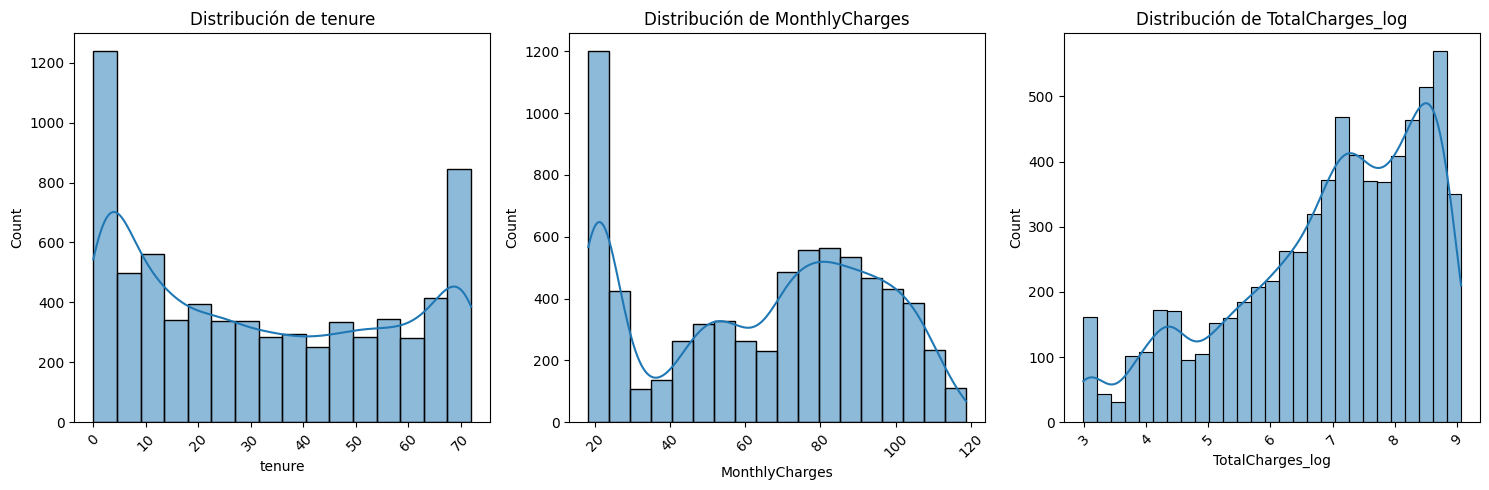


Rango de valores para cada variable numérica:
tenure:
  Min: 0
  Max: 72
  Rango: 72

MonthlyCharges:
  Min: 18.25
  Max: 118.75
  Rango: 100.5

TotalCharges:
  Min: 18.8
  Max: 8684.8
  Rango: 8666.0

Resumen de TotalCharges_log:
count    7043.000000
mean        6.943855
std         1.545275
min         2.985682
25%         5.999494
50%         7.243138
75%         8.239488
max         9.069445
Name: TotalCharges_log, dtype: float64


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Asegurar que TotalCharges sea numérico (ya imputado en la celda anterior)
if df['TotalCharges'].dtype == 'object':
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Generar columna log-transformada para TotalCharges para EDA
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])

# Recalcular columnas numéricas excluyendo SeniorCitizen (lo tratamos como int pero no como variable numérica para escalado)
numeric_cols = [c for c in ['tenure', 'MonthlyCharges', 'TotalCharges_log'] if c in df.columns]

print("Estadísticas descriptivas de las variables numéricas (usando TotalCharges_log):")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

# Crear subplots para visualizar la distribución de cada variable numérica
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis de rangos y escalas (mostrando TotalCharges original y log)
print("\nRango de valores para cada variable numérica:")
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    if col in df.columns:
        print(f"{col}:")
        print(f"  Min: {df[col].min()}")
        print(f"  Max: {df[col].max()}")
        print(f"  Rango: {df[col].max() - df[col].min()}")
        print()

print('Resumen de TotalCharges_log:')
print(df['TotalCharges_log'].describe())

In [54]:
# Prueba de normalidad sobre TotalCharges después de log-transform
import scipy.stats as stats

tc_log = df['TotalCharges_log'].dropna()
stat_log, p_log = stats.normaltest(tc_log)
print(f"D'Agostino (TotalCharges_log) stat={stat_log:.4f}, p={p_log:.4g}")
if p_log < 0.05:
    print('Conclusión: rechaza H0 -> no sigue distribución normal (p<0.05)')
else:
    print('Conclusión: no se rechaza H0 -> compatible con distribución normal (p>=0.05)')

D'Agostino (TotalCharges_log) stat=563.5717, p=4.187e-123
Conclusión: rechaza H0 -> no sigue distribución normal (p<0.05)


In [45]:
# Escalar las variables numéricas (excepto SeniorCitizen que es binaria)
scaler = StandardScaler()
columns_to_scale = ['tenure', 'MonthlyCharges']
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

print("Estadísticas descriptivas después del escalado:")
print(df_encoded[columns_to_scale].describe())

Estadísticas descriptivas después del escalado:
             tenure  MonthlyCharges
count  7.043000e+03    7.043000e+03
mean  -2.421273e-17   -6.406285e-17
std    1.000071e+00    1.000071e+00
min   -1.318165e+00   -1.545860e+00
25%   -9.516817e-01   -9.725399e-01
50%   -1.372744e-01    1.857327e-01
75%    9.214551e-01    8.338335e-01
max    1.613701e+00    1.794352e+00


Columnas categóricas a graficar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


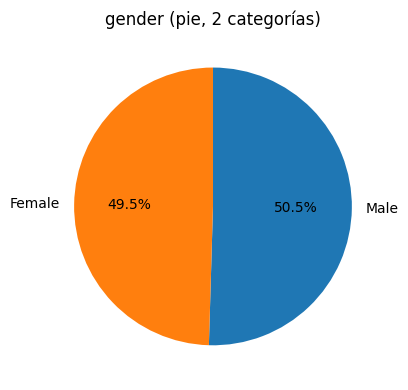

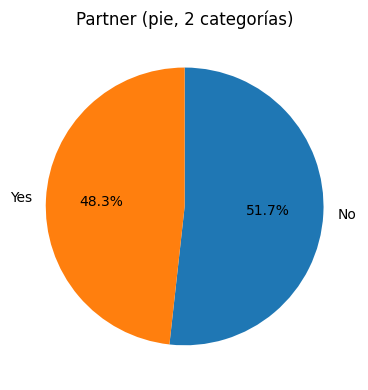

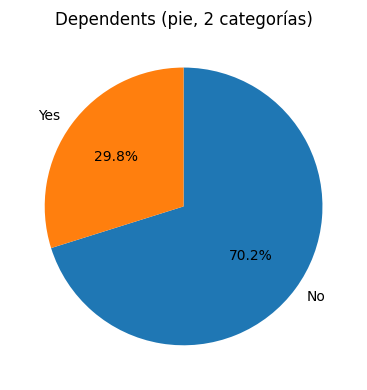

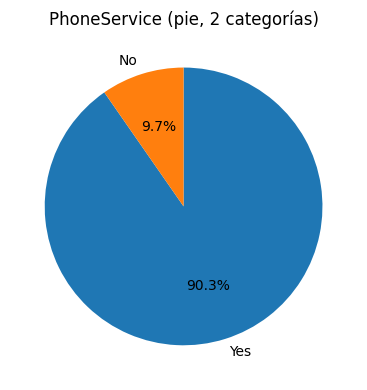

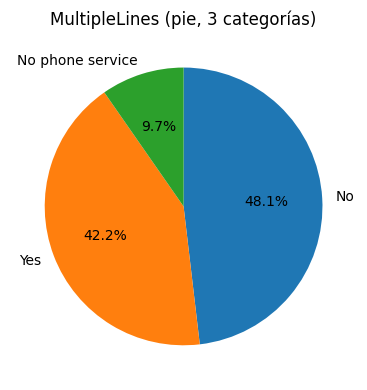

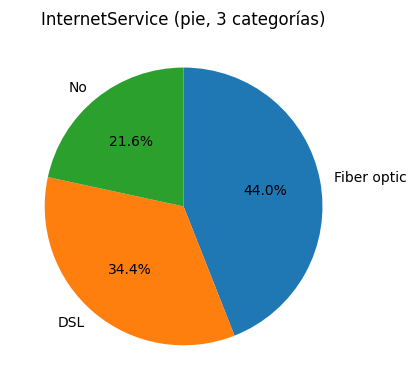

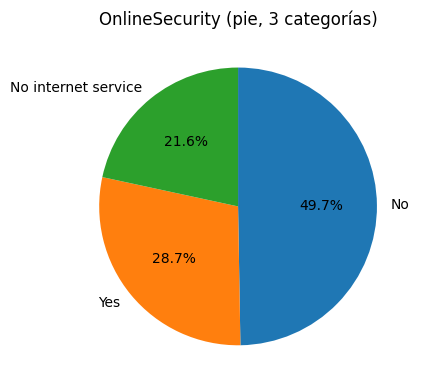

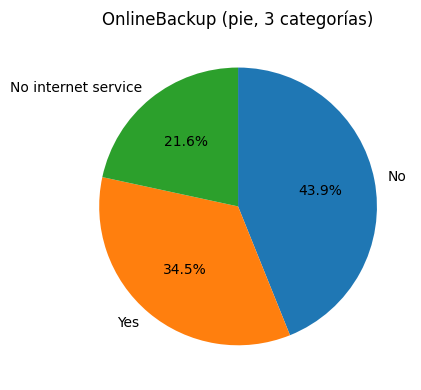

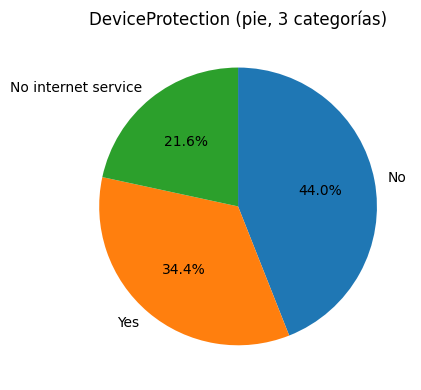

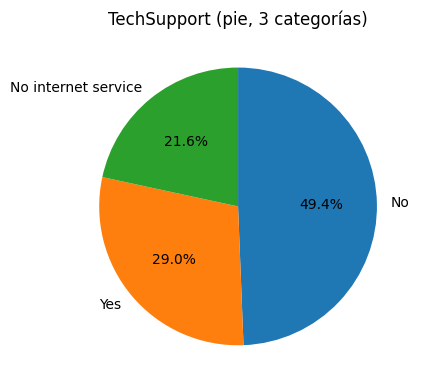

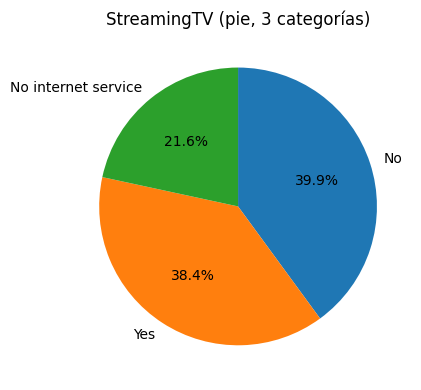

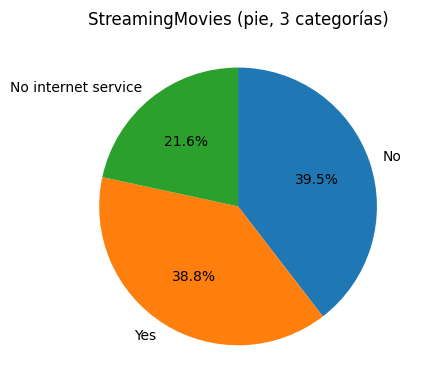

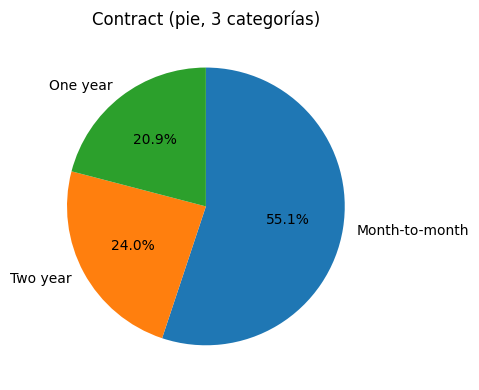

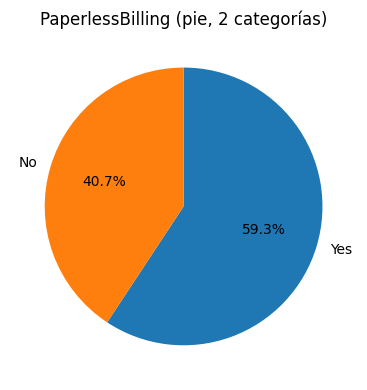

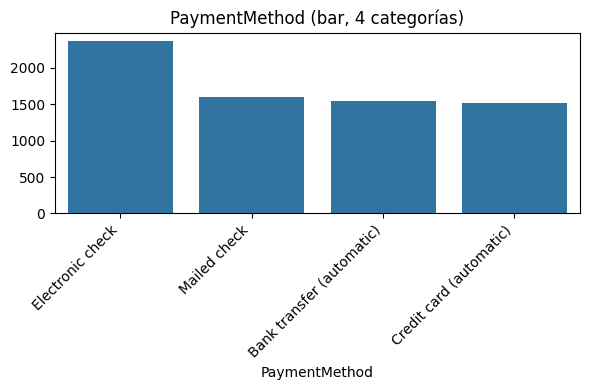

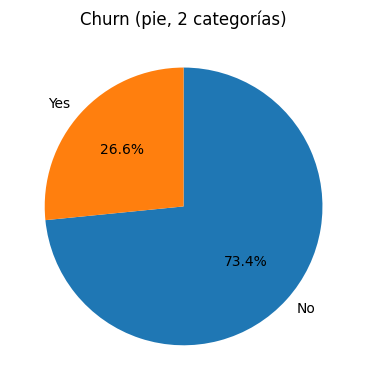

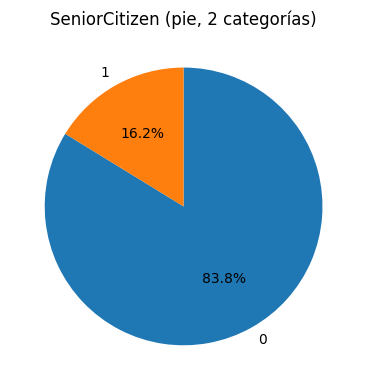

In [51]:
# Graficar variables categóricas: pie si <=3 categorías, barras si >3
import math

# Determinar columnas categóricas (object) y añadir SeniorCitizen como categórica si tiene pocas categorías
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')
if 'SeniorCitizen' in df.columns:
    # incluir SeniorCitizen para EDA categórica si tiene <= 3 valores únicos
    if df['SeniorCitizen'].nunique() <= 3:
        categorical_cols.append('SeniorCitizen')

print('Columnas categóricas a graficar:', categorical_cols)

for col in categorical_cols:
    counts = df[col].value_counts(dropna=False)
    n_categories = len(counts)
    plt.figure(figsize=(6,4))
    if n_categories <= 3:
        # Pie chart
        plt.pie(counts.values, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90, counterclock=False)
        plt.title(f'{col} (pie, {n_categories} categorías)')
    else:
        # Bar chart
        sns.barplot(x=counts.index.astype(str), y=counts.values)
        plt.title(f'{col} (bar, {n_categories} categorías)')
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Preparación del Dataset Final
Crearemos el dataset final con todas las variables procesadas y separaremos las variables predictoras (X) de la variable objetivo (y).

In [47]:
# Crear el dataset final
df_final = df_encoded.copy()

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

print("Forma de X (variables predictoras):", X.shape)
print("Forma de y (variable objetivo):", y.shape)

# Mostrar las primeras filas del dataset final
print("\nPrimeras filas del dataset final:")
print(df_final.head())

# Guardar los nombres de las columnas para referencia futura
feature_names = X.columns.tolist()
print("\nVariables predictoras:")
print(feature_names)

Forma de X (variables predictoras): (7043, 20)
Forma de y (variable objetivo): (7043,)

Primeras filas del dataset final:
   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0        5375       0              0        1           0 -1.277445   
1        3962       1              0        0           0  0.066327   
2        2564       1              0        0           0 -1.236724   
3        5535       1              0        0           0  0.514251   
4        6511       0              0        0           0 -1.236724   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtectio

In [52]:
# --- Limpieza y conversión de TotalCharges (imputación condicional) ---
# Cargar de nuevo para asegurarnos de partir del dataset original
df = pd.read_csv('data.csv')

# Convertir TotalCharges a numérico (coerce para detectar valores problemáticos)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
missing_before = df['TotalCharges'].isna().sum()
print(f"Total de filas con TotalCharges no convertibles (NaN): {missing_before}")

if missing_before > 0:
    # Test de normalidad sobre valores no nulos
    import scipy.stats as stats
    tc = df['TotalCharges'].dropna()
    stat, p = stats.normaltest(tc)
    print(f"Normality test D'Agostino stat={stat:.4f}, p={p:.4g}")
    # Si no sigue una distribución normal, imputar por mediana; si sigue, imputar por moda
    if p < 0.05:
        print("No sigue distribución normal -> imputar por mediana")
        impute_value = tc.median()
    else:
        print("Sigue distribución normal -> imputar por moda")
        impute_value = tc.mode().iloc[0]
    df['TotalCharges'].fillna(impute_value, inplace=True)
    print(f"Imputado {missing_before} valores de TotalCharges por {impute_value}")

# Asegurar SeniorCitizen como int (pero lo mantenemos como passthrough en transformaciones)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
print('\nSeniorCitizen dtype ahora:', df['SeniorCitizen'].dtype)

# Recalcular listas de columnas (no incluir SeniorCitizen en numeric_cols para escalado)
numeric_cols = [c for c in df.select_dtypes(include=['int64','float64']).columns if c != 'SeniorCitizen']
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print('\nNumeric cols (para escalado):', numeric_cols)
print('\nCategorical cols (para encoding):', categorical_cols)


Total de filas con TotalCharges no convertibles (NaN): 11
Normality test D'Agostino stat=805.9834, p=9.614e-176
No sigue distribución normal -> imputar por mediana
Imputado 11 valores de TotalCharges por 1397.475

SeniorCitizen dtype ahora: int64

Numeric cols (para escalado): ['tenure', 'MonthlyCharges', 'TotalCharges']

Categorical cols (para encoding): ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


C:\Users\locos\AppData\Local\Temp\ipykernel_15428\1616583436.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(impute_value, inplace=True)


In [49]:
# --- Preparamos la función que construye y aplica el pipeline ---
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
import scipy.sparse as sp
import numpy as np
from sklearn.preprocessing import StandardScaler


def prepare_pipeline_and_data(df_input, target_col='Churn', id_col='customerID'):
    """Construye un pipeline que realiza:
       - conversión de TotalCharges a numérico y eliminación de filas inválidas
       - imputación de TotalCharges si hace falta (mediana)
       - log-transform de TotalCharges
       - escalado de variables numéricas (tenure, MonthlyCharges, TotalCharges_log)
       - one-hot encoding de variables categóricas
       - deja SeniorCitizen tal cual (int) como passthrough
       Retorna: X_df (DataFrame procesado), y (Series), fitted pipeline
    """
    # Copia para no modificar el original
    df2 = df_input.copy()

    # Convertir TotalCharges y, si existen NaNs (posibles por re-ejecuciones), imputar por mediana
    df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')
    if df2['TotalCharges'].isna().sum() > 0:
        df2['TotalCharges'].fillna(df2['TotalCharges'].median(), inplace=True)

    # Convertir SeniorCitizen a int
    if 'SeniorCitizen' in df2.columns:
        df2['SeniorCitizen'] = df2['SeniorCitizen'].astype(int)

    # Preparar y
    y = df2[target_col].map({'Yes': 1, 'No': 0}) if df2[target_col].dtype == 'object' else df2[target_col]

    # Eliminar id y target para X
    X = df2.drop(columns=[target_col])
    if id_col in X.columns:
        X = X.drop(columns=[id_col])

    # Definir columnas numéricas a escalar y categóricas a one-hot
    numeric_basic = [c for c in ['tenure', 'MonthlyCharges'] if c in X.columns]
    numeric_total = ['TotalCharges'] if 'TotalCharges' in X.columns else []

    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    # Transformador para TotalCharges: log1p then scaler
    total_transformer = Pipeline(steps=[
        ('log', FunctionTransformer(np.log1p, validate=False)),
        ('scaler', StandardScaler())
    ])

    # Transformador para other numerics
    numeric_transformer = StandardScaler()

    # Categorical transformer
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    transformers = []
    if numeric_basic:
        transformers.append(('num', numeric_transformer, numeric_basic))
    if numeric_total:
        transformers.append(('total', total_transformer, numeric_total))
    if categorical_features:
        transformers.append(('cat', categorical_transformer, categorical_features))

    preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Ajustar y transformar
    X_trans = pipeline.fit_transform(X)
    if sp.issparse(X_trans):
        X_trans = X_trans.toarray()

    # Obtener nombres de columnas resultantes
    try:
        feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
    except Exception:
        num_names = numeric_basic
        try:
            cat_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
        except Exception:
            cat_names = []
            for c in categorical_features:
                unique_vals = X[c].astype(str).unique().tolist()
                cat_names.extend([f"{c}_{v}" for v in unique_vals])
        total_names = ['TotalCharges_log'] if numeric_total else []
        passthrough_names = [c for c in X.columns if c not in numeric_basic + numeric_total + categorical_features]
        feature_names = list(num_names) + total_names + list(cat_names) + passthrough_names

    X_df = pd.DataFrame(X_trans, columns=feature_names)
    X_df.index = df2.index
    y.index = df2.index
    return X_df, y, pipeline


# Ejecutar la función con el DataFrame actual
X_processed, y, fitted_pipeline = prepare_pipeline_and_data(df)
print('Shape X_processed:', X_processed.shape)
print('Shape y:', y.shape)
print('\nPrimeras columnas procesadas:')
print(X_processed.columns[:60].tolist())

Shape X_processed: (7032, 45)
Shape y: (7032,)

Primeras columnas procesadas:
['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges', 'cat__gender_Female', 'cat__gender_Male', 'cat__Partner_No', 'cat__Partner_Yes', 'cat__Dependents_No', 'cat__Dependents_Yes', 'cat__PhoneService_No', 'cat__PhoneService_Yes', 'cat__MultipleLines_No', 'cat__MultipleLines_No phone service', 'cat__MultipleLines_Yes', 'cat__InternetService_DSL', 'cat__InternetService_Fiber optic', 'cat__InternetService_No', 'cat__OnlineSecurity_No', 'cat__OnlineSecurity_No internet service', 'cat__OnlineSecurity_Yes', 'cat__OnlineBackup_No', 'cat__OnlineBackup_No internet service', 'cat__OnlineBackup_Yes', 'cat__DeviceProtection_No', 'cat__DeviceProtection_No internet service', 'cat__DeviceProtection_Yes', 'cat__TechSupport_No', 'cat__TechSupport_No internet service', 'cat__TechSupport_Yes', 'cat__StreamingTV_No', 'cat__StreamingTV_No internet service', 'cat__StreamingTV_Yes', 'cat__StreamingMovies_No', 'cat__StreamingMo